In [ ]:
## Import necessary librarise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#read cvs file
df = pd.read_csv('../dataset/processed/crop_yield_cleansing_data.csv')

# Display the first 5 rows
df.head()

Date Crop_Type Soil_Type  Soil_pH  Temperature  Humidity  Wind_Speed  \
0  2014-01-01     Wheat     Peaty     5.50            9        80          11   
1  2014-01-01      Corn     Loamy     6.50           20        80           9   
2  2014-01-01      Rice     Peaty     5.50           12        80           7   
3  2014-01-01    Barley     Sandy     6.75           20        80           3   
4  2014-01-01   Soybean     Peaty     5.50           16        80           8   

      N     P     K  Crop_Yield  Soil_Quality  Year  Month  Day  \
0  60.5  45.0  31.5    0.000000            23  2014      1    1   
1  84.0  66.0  50.0  104.871310            67  2014      1    1   
2  71.5  54.0  38.5    0.000000            27  2014      1    1   
3  50.0  40.0  30.0   58.939796            35  2014      1    1   
4  49.5  45.0  38.5   32.970413            22  2014      1    1   

   Temperature_orig  Humidity_orig  Wind_Speed_orig  Soil_Quality_orig  
0          9.440599      80.000000        10.956707          22.833333  
1         20.052576      79.947424         8.591577          66.666667  
2         12.143099      80.000000         7.227751          27.333333  
3         19.751848      80.000000         2.682683          35.000000  
4         16.110395      80.000000         7.696070          22.166667

In [3]:
print(df.isnull().sum())

Date                 0
Crop_Type            0
Soil_Type            0
Soil_pH              0
Temperature          0
Humidity             0
Wind_Speed           0
N                    0
P                    0
K                    0
Crop_Yield           0
Soil_Quality         0
Year                 0
Month                0
Day                  0
Temperature_orig     0
Humidity_orig        0
Wind_Speed_orig      0
Soil_Quality_orig    0
dtype: int64


In [4]:
#Print data info (data types, non-null counts, memory usage)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36211 entries, 0 to 36210
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               36211 non-null  object 
 1   Crop_Type          36211 non-null  object 
 2   Soil_Type          36211 non-null  object 
 3   Soil_pH            36211 non-null  float64
 4   Temperature        36211 non-null  int64  
 5   Humidity           36211 non-null  int64  
 6   Wind_Speed         36211 non-null  int64  
 7   N                  36211 non-null  float64
 8   P                  36211 non-null  float64
 9   K                  36211 non-null  float64
 10  Crop_Yield         36211 non-null  float64
 11  Soil_Quality       36211 non-null  int64  
 12  Year               36211 non-null  int64  
 13  Month              36211 non-null  int64  
 14  Day                36211 non-null  int64  
 15  Temperature_orig   36211 non-null  float64
 16  Humidity_orig      362

In [5]:
#Display summary statistics for numerical columns
print(df.describe())

            Soil_pH  Temperature      Humidity    Wind_Speed             N  \
count  36211.000000  36211.00000  36211.000000  36211.000000  36211.000000   
mean       6.602386     23.70172     74.360636     10.017674     66.015037   
std        0.817180      8.79772      6.621080      2.958372     10.888556   
min        5.500000     -4.00000     55.000000      2.000000     45.000000   
25%        6.250000     17.00000     70.000000      8.000000     58.500000   
50%        6.500000     23.00000     77.000000     10.000000     65.000000   
75%        6.750000     30.00000     80.000000     12.000000     71.500000   
max        8.000000     45.00000     80.000000     18.000000     91.000000   

                  P             K    Crop_Yield  Soil_Quality          Year  \
count  36211.000000  36211.000000  36211.000000  36211.000000  36211.000000   
mean      53.017591     42.020684     27.009032     37.528817   2018.499710   
std        8.812486      8.538663     25.742822     17.70242

## Weather Analysis

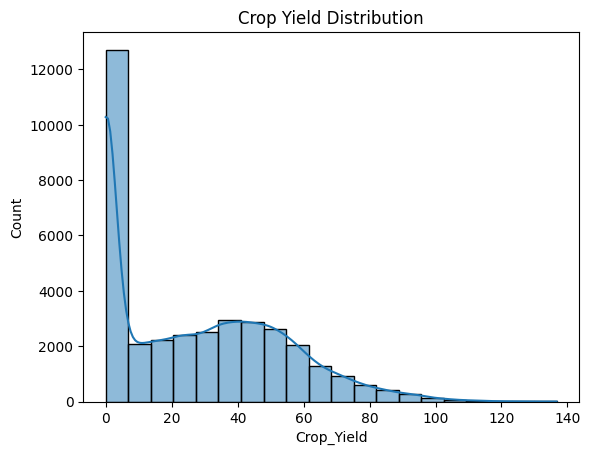

In [6]:
# Crop Yield distribution
sns.histplot(df['Crop_Yield'], kde=True, bins=20)
plt.title("Crop Yield Distribution")
plt.show()

### Insights from the graph
- The histogram shows the distribution of Crop_Yield.
- There is a very high frequency at yield = 0, which likely represents crop failure or unsuitable soil/weather conditions.
- Excluding zero, most yields fall within the range of 20 to 60 units, with a noticeable peak around 40.
- Yields above 80 gradually decline, forming a long right tail.

**In summary, the distribution indicates a skewed pattern with many zero values. For modeling, handling zero yields and addressing the skewness will be critical steps.**

  Crop_Type  Year  Crop_Yield
0    Barley  2014   25.147285
1    Barley  2015   25.097641
2    Barley  2016   24.684059
3    Barley  2017   26.380553
4    Barley  2018   24.888006


Text(0, 0.5, 'Average Crop Yield')

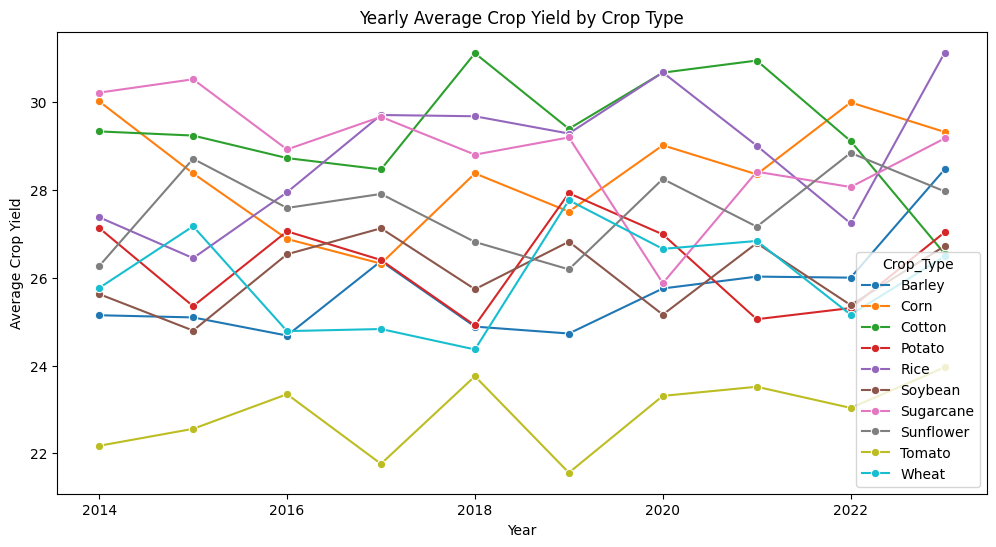

In [7]:
# Group the data by Crop_Type and Year, then calculate the average Crop_Yield
grouped = df.groupby(['Crop_Type', 'Year'])['Crop_Yield'].mean().reset_index()
print(grouped.head())

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot a line chart showing average crop yield per year by crop type
sns.lineplot(data=grouped, x='Year', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Yearly Average Crop Yield by Crop Type")
plt.xlabel("Year")
plt.ylabel("Average Crop Yield")

### Insights from the graph
1. Top Group (Avg. Yield ≈ 29–32)
- Cotton, Rice, Sunflower
- Consistently achieve the highest yields, indicating strong productivity throughout the period.
2. Middle Group (Avg. Yield ≈ 26–29)
- Corn, Potato, Soybean, Sugarcane, Wheat, Barley
- Show relatively stable yields with occasional fluctuations (notably in 2018 and 2020).
- Corn demonstrates some variability but remains in the upper-mid range.
3. Bottom Group (Avg. Yield ≈ 22–24)
- Tomato
- Records the lowest yields across all years, clearly standing apart from the other crops.

**In summary, while the relative ranking among crops is consistent, certain crops show higher year-to-year variability likely due to climate or soil conditions.**

C:\Users\james\AppData\Local\Temp\ipykernel_27624\668441828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Temperature', y='Crop_Yield', palette='viridis')


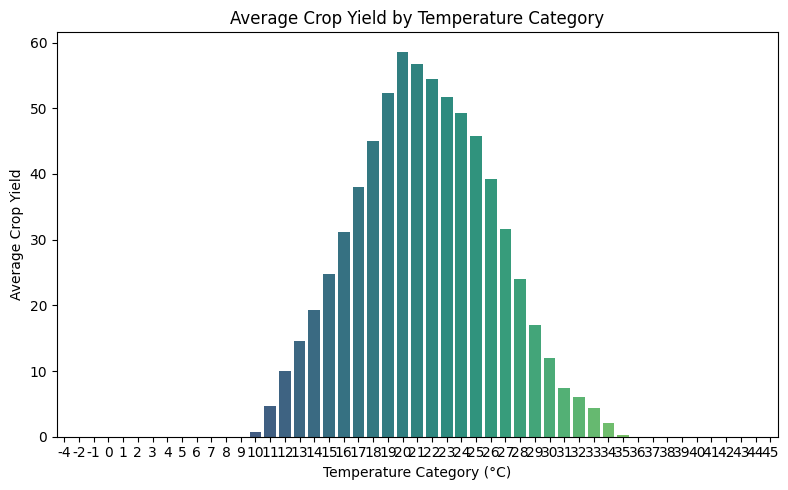

In [47]:
# Calculate mean Crop_Yield per temperature category
grouped = df.groupby('Temperature')['Crop_Yield'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Temperature', y='Crop_Yield', palette='viridis')

plt.title("Average Crop Yield by Temperature Category")
plt.xlabel("Temperature Category (°C)")
plt.ylabel("Average Crop Yield")
plt.tight_layout()
plt.show()

### Insights from the graph
- The chart illustrates the relationship between temperature (°C) and average crop yield.
- Yields start to increase noticeably after 10°C, peaking at around 20–22°C (≈58–60 units).
- Beyond 25°C, yields gradually decline, and after 30°C, the drop becomes steep.
- At 35°C and above, yields are almost negligible.

**In summary, the optimal temperature range for crop yield is approximately 20–25°C, which provides valuable insight for agricultural planning and climate adaptation strategies.**

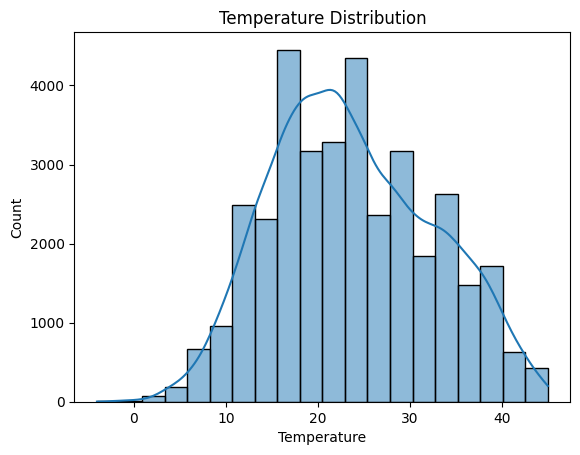

In [9]:
# Histogram: Show the distribution of Temperature values
# bins=20 → split into 20 intervals / kde=True → add KDE curve
sns.histplot(df['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution")
plt.show()

### Insights from the graph
- The chart illustrates the relationship between temperature (°C) and average crop yield.
- Yields start to increase noticeably after 10°C, peaking at around 20–22°C (≈58–60 units).
- Beyond 25°C, yields gradually decline, and after 30°C, the drop becomes steep.
- At 35°C and above, yields are almost negligible.

**In summary, the optimal temperature range for crop yield is approximately 20–25°C, which provides valuable insight for agricultural planning and climate adaptation strategies.**

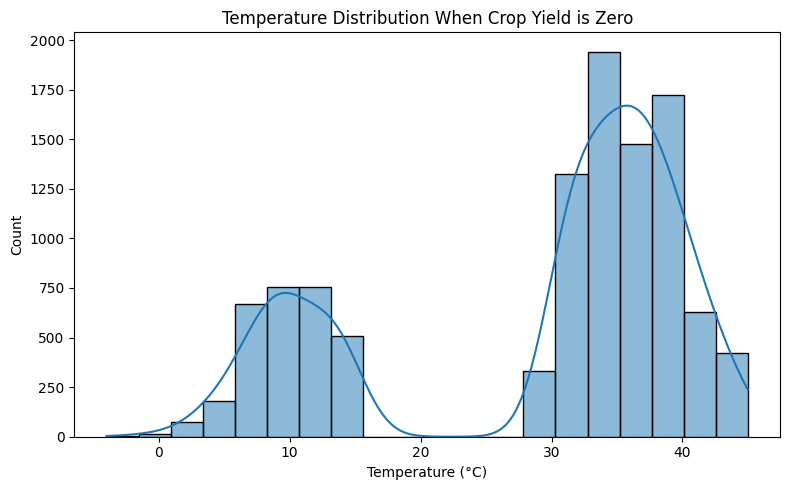

In [48]:
# Filter rows where Crop_Yield is 0
zero_yield = df[df['Crop_Yield'] == 0]

plt.figure(figsize=(8, 5))
sns.histplot(zero_yield['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution When Crop Yield is Zero")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Insights from the graph
- The chart shows the temperature distribution when crop yield equals zero.
- The pattern reveals a bimodal distribution, with two main clusters:
   - Around 5–15°C: Low temperatures strongly associated with crop failure.
   - Around 30–40°C: High temperatures also result in frequent yield failures.
- This indicates that both low and high extremes are unfavorable for crop growth.

**In summary, the result reinforces that outside the optimal range (20–25°C), the likelihood of yield failure significantly increases.**

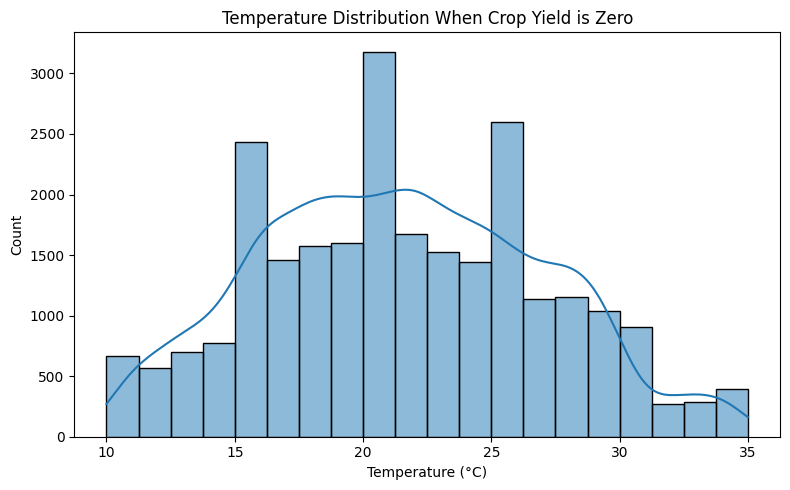

In [49]:
# Filter rows where Crop_Yield is 0
zero_yield = df[df['Crop_Yield'] != 0]

plt.figure(figsize=(8, 5))
sns.histplot(zero_yield['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution When Crop Yield is Zero")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Insights from the graph
- The chart shows the temperature distribution when crop yield equals zero.
- Zero-yield cases are spread broadly across the 10°C to 30°C range, with a noticeable peak around 20°C (over 3,000 records).
- Many failures also occur in the 15–25°C range, which is generally considered optimal for crop growth.
- This suggests that yield failures are not solely caused by temperature, but may also be linked to soil conditions, water availability, nutrient deficiencies, or pests/diseases.

**In summary, while temperature is a critical factor, zero yield outcomes are driven by multiple interacting variables.**

In [11]:
# Define custom bins (in °C)
bins = [-10, 0, 10, 20, 30, 55]  # 예: 0~10, 10~20, 20~30, 30~40
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'Temp_Category' based on the bins
df['Temp_Category'] = pd.cut(df['Temperature'], bins=bins, labels=labels, include_lowest=True)

print(df[['Temperature', 'Temp_Category']].head())

   Temperature Temp_Category
0            9           Low
1           20        Medium
2           12        Medium
3           20        Medium
4           16        Medium


C:\Users\james\AppData\Local\Temp\ipykernel_30584\2169405901.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Temp_Category')['Crop_Yield'].mean().reset_index()
C:\Users\james\AppData\Local\Temp\ipykernel_30584\2169405901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Temp_Category', y='Crop_Yield', palette='viridis')


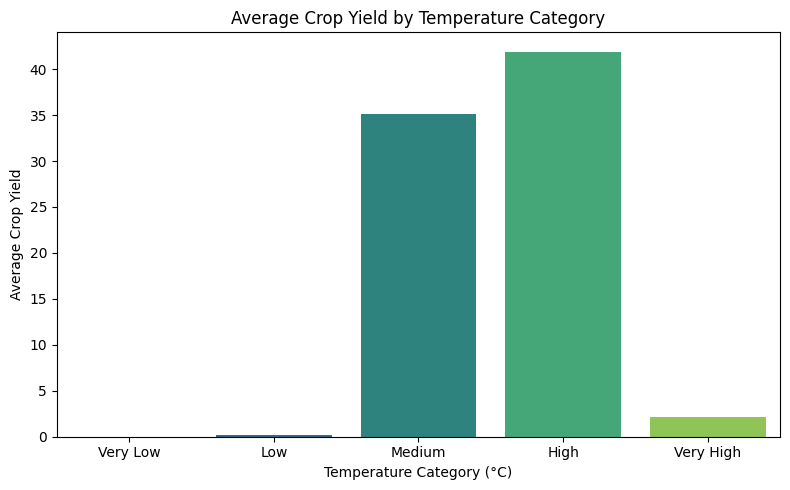

In [42]:
# Calculate mean Crop_Yield per temperature category
grouped = df.groupby('Temp_Category')['Crop_Yield'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Temp_Category', y='Crop_Yield', palette='viridis')

plt.title("Average Crop Yield by Temperature Category")
plt.xlabel("Temperature Category (°C)")
plt.ylabel("Average Crop Yield")
plt.tight_layout()
plt.show()

### Insights from the graph
- The chart compares average crop yields across five temperature categories: Very Low, Low, Medium, High, and Very High.
- Yields are almost negligible in the Very Low and Low categories.
- In the Medium range (≈15–20°C), yields rise to around 35.
- The High category (≈20–25°C) achieves the highest average yield (≈42).
- In the Very High range (above ≈30°C), yields drop sharply to below 2.

**In summary, the High temperature range (20–25°C) is optimal for crop yield, while both extremely low and high temperatures significantly reduce productivity.**

In [12]:
# Temperature
# Group by Crop_Type and calculate mean Temperature and Crop_Yield
grouped = df.groupby('Crop_Type')[['Temperature', 'Crop_Yield']].mean().reset_index()
print(grouped)

   Crop_Type  Temperature  Crop_Yield
0     Barley    23.671642   25.717256
1       Corn    23.649917   28.422254
2     Cotton    23.656819   29.355749
3     Potato    23.856867   26.318206
4       Rice    23.661882   28.850566
5    Soybean    23.670163   26.071745
6  Sugarcane    23.664181   28.889817
7  Sunflower    23.752831   27.574608
8     Tomato    23.778423   22.896930
9      Wheat    23.654420   25.984437


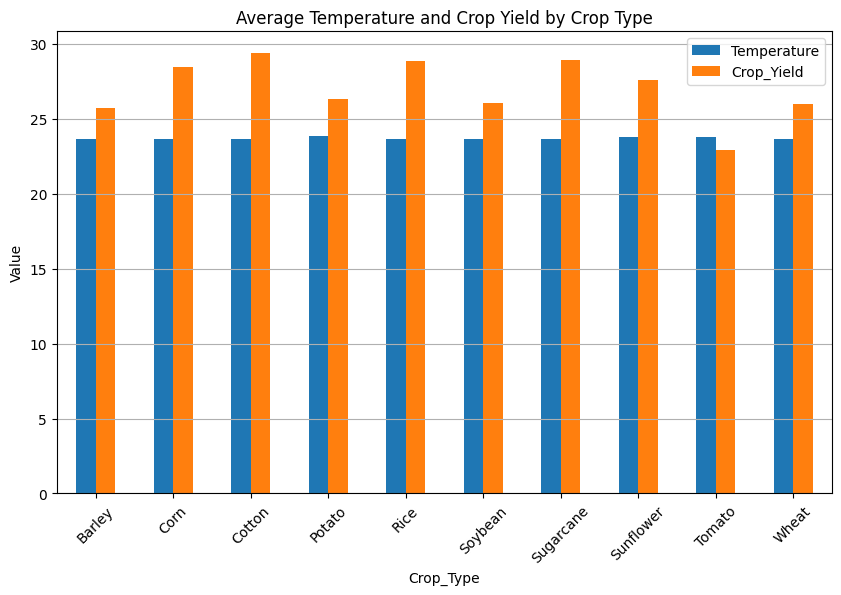

In [13]:
# Bar plot for average Temperature and Crop_Yield
grouped.plot(x='Crop_Type', y=['Temperature', 'Crop_Yield'], kind='bar', figsize=(10,6))
plt.title("Average Temperature and Crop Yield by Crop Type")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Insights from the graph
- The chart compares average cultivation temperature (blue) and average crop yield (orange) for each crop type.
- Across all crops, crop yield values are slightly higher than temperature values.
- Cotton, Rice, and Sugarcane show the highest yields (~29), indicating stronger productivity.
- Tomato has the lowest yield (~23) compared to other crops.
- Temperatures remain fairly consistent across crops (≈23–24°C), suggesting that yield differences are 
primarily due to - crop-specific traits and adaptability, rather than temperature variation.

**In summary, while temperature conditions are relatively uniform, crop yield varies significantly by crop type.**

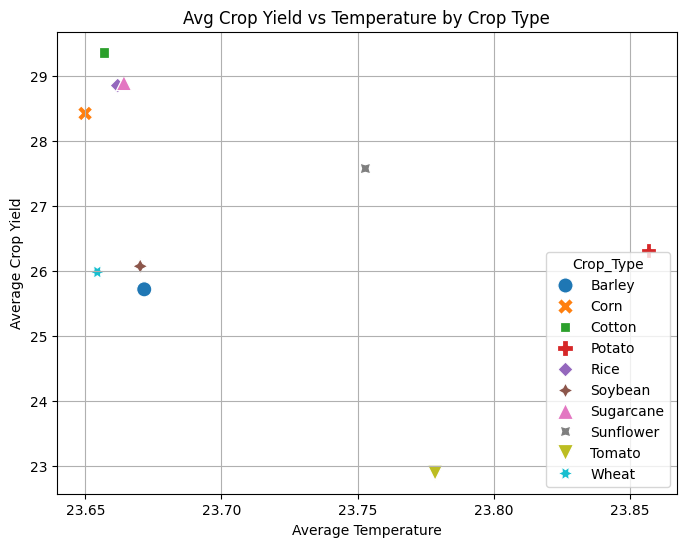

In [14]:
# Set figure size
plt.figure(figsize=(8,6))

# Scatter plot with different colors and markers by Crop_Type
sns.scatterplot(
    data=grouped,
    x='Temperature',
    y='Crop_Yield',
    hue='Crop_Type',      # Different colors by crop
    style='Crop_Type',    # Different marker shapes by crop
    s=120                 # Marker size
)

# Add chart title and labels
plt.title("Avg Crop Yield vs Temperature by Crop Type")
plt.xlabel("Average Temperature")
plt.ylabel("Average Crop Yield")

# Add grid
plt.grid(True)

# Show plot
plt.show()

### Insights from the graph
- The x-axis shows average temperature (≈23.65–23.85°C), while the y-axis represents average crop yield (≈23–29).
- All crops share very similar average temperatures, meaning that temperature does not explain the variation in yield across crop types.
- Instead, crop-specific characteristics appear to be the primary drivers of yield differences.
- Cotton, Rice, and Sugarcane achieve the highest yields (≈29+).
- Corn and Sunflower fall in the mid-range (≈27–28).
- Barley, Soybean, Wheat, and Potato are slightly lower (≈25–26).
- Tomato has the lowest average yield (≈23), standing out clearly from other crops.

In [16]:
# Temp_Category
# Group by Crop_Type and Temp_Category, then calculate mean Crop_Yield
grouped = df.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().reset_index()
print(grouped.head())

  Crop_Type Temp_Category  Crop_Yield
0    Barley      Very Low    0.000000
1    Barley           Low    0.256694
2    Barley        Medium   40.401754
3    Barley          High   33.403675
4    Barley     Very High    0.000000


C:\Users\james\AppData\Local\Temp\ipykernel_27624\2673329816.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().reset_index()


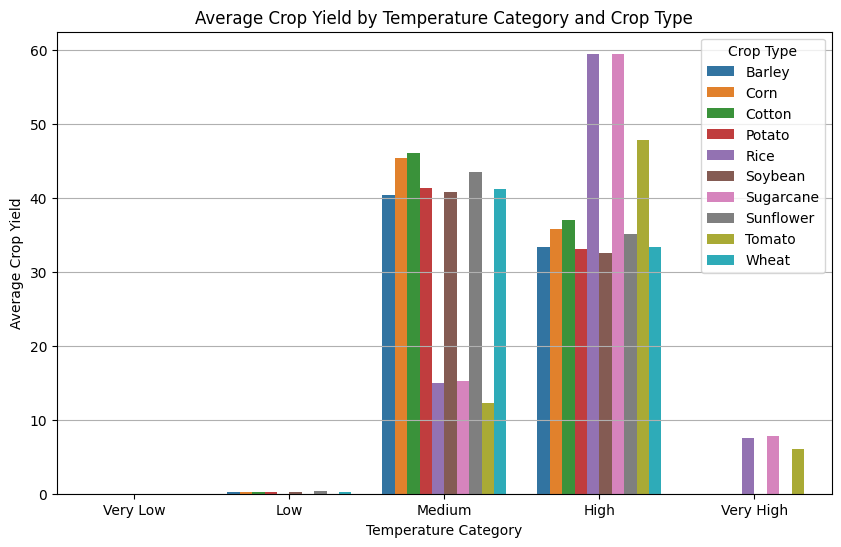

In [17]:
# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Create a bar plot
# x-axis: Temperature Category (Low, Medium, High, etc.)
# y-axis: Average Crop Yield
# hue: Different colors for each Crop_Type
sns.barplot(
    data=grouped,
    x='Temp_Category',
    y='Crop_Yield',
    hue='Crop_Type'
)

# Add title to the chart
plt.title("Average Crop Yield by Temperature Category and Crop Type")
plt.xlabel("Temperature Category")
plt.ylabel("Average Crop Yield")
plt.legend(title='Crop Type')
plt.grid(axis='y')
plt.show()

### Insights from the graph
- The chart compares average crop yields across five temperature categories (Very Low, Low, Medium, High, Very High) by crop type.
- In the Very Low and Low ranges, yields are nearly zero across all crops.
- In the Medium range (≈15–20°C), yields rise to around 40–46, with Cotton and Corn performing relatively better.
- In the High range (≈20–25°C), most crops achieve their maximum yields. Notably, Rice and Sugarcane peak at ≈60, while - Tomato also reaches ≈48. This indicates that the optimal growth zone for many crops is concentrated in this range.
- In the Very High range (above 30°C), yields decline sharply, with most crops dropping below 10, except for Rice, Sugarcane, and Tomato which still retain modest values.

**In summary, the High temperature category (20–25°C) emerges as the optimal zone for crop productivity across most crop types.**

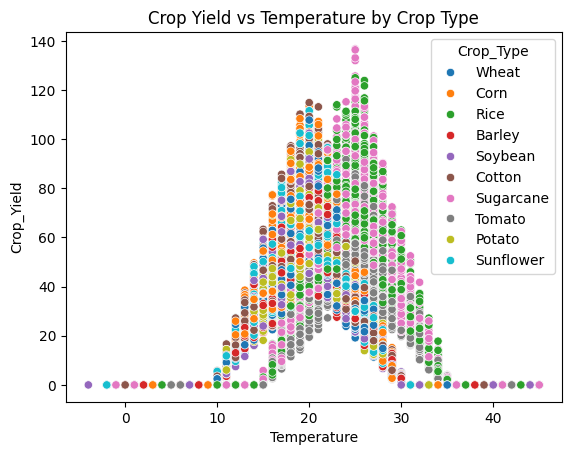

In [18]:
# Bivariate Analysis (Relationship between two variables)
# Scatter plot: Temperature vs Crop Yield by Crop Type
sns.scatterplot(data=df, x='Temperature', y='Crop_Yield', hue='Crop_Type')
plt.title("Crop Yield vs Temperature by Crop Type")
plt.show()

### Insights from the graph
- The scatter plot shows the relationship between temperature (°C, x-axis) and crop yield (y-axis), with each crop type represented by a different color.
- Yields are heavily concentrated within the 10–30°C range, peaking at 20–25°C where maximum yields (~100–140) are observed.
- At temperatures below 10°C and above 35°C, yields approach zero, indicating very poor productivity under extreme conditions.
- The distribution patterns are similar across crop types, suggesting that while temperature is a key limiting factor, the relative response among crops is consistent.
- Rice, Corn, and Cotton achieve their highest yields within the 20–25°C zone, while Tomato and Potato follow a similar trend.

**In summary, the chart clearly demonstrates that temperature strongly influences crop yield, with the optimal range being approximately 20–25°C**

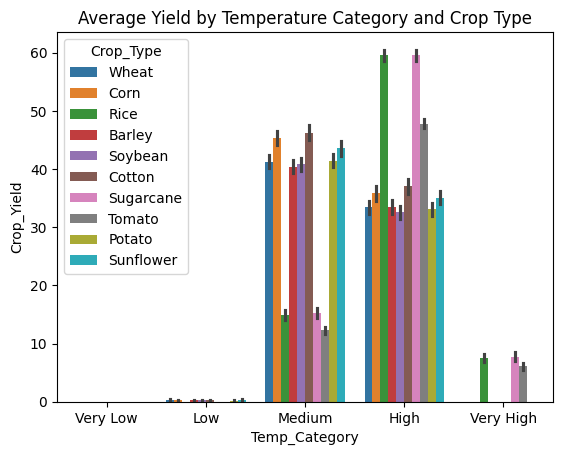

In [19]:
# Bar plot: Average Yield by Temperature Category and Crop Type
sns.barplot(data=df, x='Temp_Category', y='Crop_Yield', hue='Crop_Type')
plt.title("Average Yield by Temperature Category and Crop Type")
plt.show()

### Insights from the graph
- Very Low and Low categories: Crop yields are nearly zero, indicating that these ranges are unsuitable for cultivation.
- Medium category (≈15–20°C): Most crops achieve yields around 40–45, with Corn, Cotton, and Sunflower performing relatively better.
- High category (≈20–25°C): This is the optimal range, where most crops reach their peak productivity.
    - Rice and Sugarcane rise to ≈60, the highest among all crops.
    - Tomato also shows a strong improvement, exceeding 45.
    - However, Wheat, Barley, and Soybean remain lower at around 30–35.
- Very High category (above 30°C): Yields decline sharply for almost all crops, with only a few retaining minimal productivity.

**In summary, the High temperature category (20–25°C) emerges as the optimal growth zone for the majority of crops.**

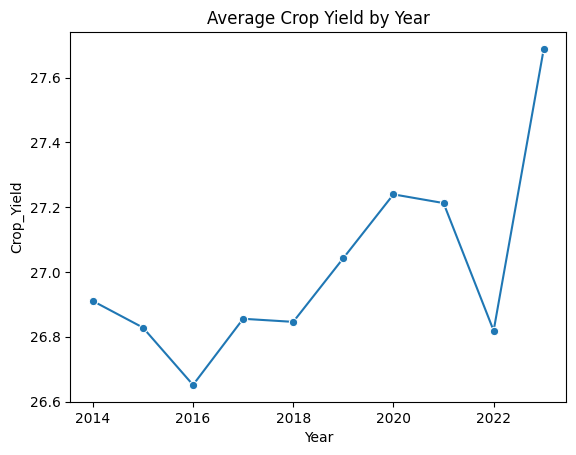

In [20]:
# Time-series Analysis
# Average yearly yield
yearly_yield = df.groupby('Year')['Crop_Yield'].mean().reset_index()
sns.lineplot(data=yearly_yield, x='Year', y='Crop_Yield', marker='o')
plt.title("Average Crop Yield by Year")
plt.show()




### Insights from the graph
- The chart shows the trend of average crop yield from 2014 to 2023.
- Overall, fluctuations are relatively small, with yields remaining stable in the range of 26.6 to 27.7.
- The lowest point occurred in 2016 (≈26.6), followed by a gradual increase.
- Around 2020, yields peaked slightly (≈27.2), then dipped in 2022, before rising sharply in 2023 to the highest level (≈27.7+).

**In summary, crop yields have been relatively stable over the past decade, with a notable improvement in 2023.**

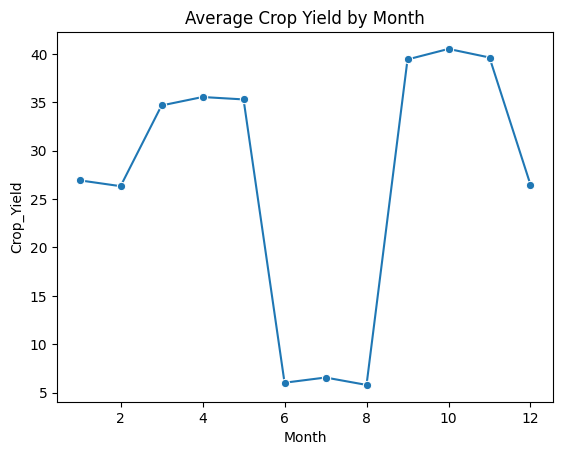

In [21]:
# Average monthly yield
monthly_yield = df.groupby('Month')['Crop_Yield'].mean().reset_index()
sns.lineplot(data=monthly_yield, x='Month', y='Crop_Yield', marker='o')
plt.title("Average Crop Yield by Month")
plt.show()

### Insights from the graph
- January to May (early spring to late spring): Yields increase steadily, reaching above 35 in April–May.
- June to August (summer): Yields drop sharply, hitting the lowest point (≈5–6).
- September to November (autumn): Yields surge again, peaking at ≈40–41 in October.
- December (early winter): Yields decline back to ≈27.

**In summary, crop yields follow a distinct seasonal pattern, with spring (Apr–May) and autumn (Sep–Nov) emerging as the most productive periods.**

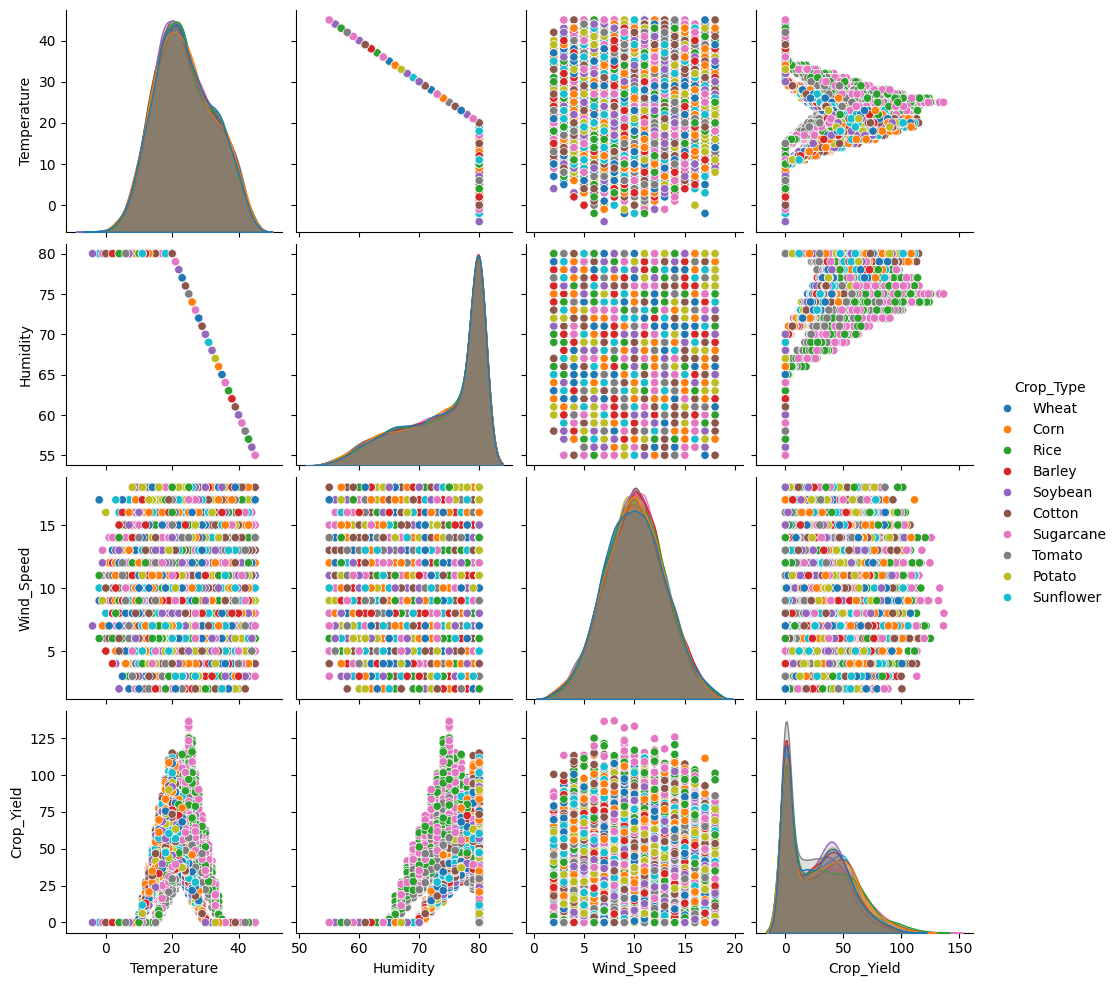

In [22]:
# Multivariate Analysis (Extra)
# Pair plot to visualize multiple relationships at once
sns.pairplot(df[['Temperature','Humidity','Wind_Speed','Crop_Yield','Crop_Type']], hue='Crop_Type')
plt.show()

### Insights from the graph
- Temperature
  - Most values fall within 15–30°C, with little variation across crop types.
  - The relationship with Crop_Yield shows maximum yields at 20–25°C.
- Humidity
  - Concentrated between 60–80%, with yields peaking around ~70%.
  - A clear negative relationship between temperature and humidity is observed.
- Wind_Speed
  - Distributed evenly from 0–20 m/s, but shows no strong correlation with yield.
  - Suggests wind speed has a limited effect on productivity.
- Crop_Yield
  - Distribution is concentrated at 0 and 20–60, with some outliers above 100.
  - Zero-yield cases are associated with extreme temperature or humidity conditions.

**In summary:**
- Temperature (20–25°C) and Humidity (~70%) are the most critical factors for maximizing yield.
- Wind speed has little impact.
- Zero yields highlight failure conditions linked to unfavorable weather extremes.

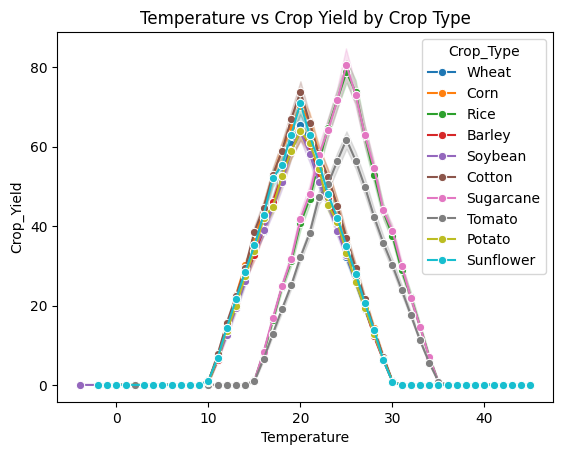

In [23]:
# Line plot of Temperature vs Crop_Yield by Crop_Type
# Purpose:
#   - Show how Crop_Yield changes with Temperature
#   - Use hue="Crop_Type" to compare different crops on the same plot
#   - Marker 'o' highlights individual data points along the line
sns.lineplot(data=df, x='Temperature', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Temperature vs Crop Yield by Crop Type")
plt.show()

### Insights from the graph
- All crops exhibit a similar yield response pattern to temperature.
- At temperatures below 10°C, yields are nearly zero.
- Yields increase sharply between 15–25°C, peaking around 20–25°C (≈70–80+).
- Beyond 25°C, yields start to decline, and above 30°C, they approach zero again.
- Differences among crops are minor, though Sugarcane and Rice show slightly higher peaks (~80+) around 25°C.

**In summary, the chart confirms that the optimal temperature range for most crops is 20–25°C, beyond which yields decline rapidly.**

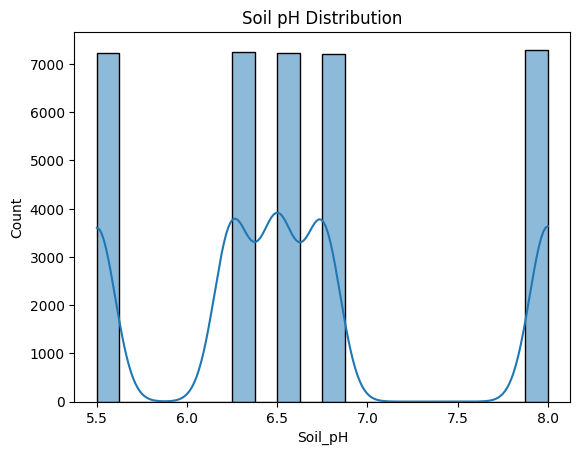

In [24]:
# Data Distribution
# Visualizes the distribution of soil pH values
# Soil pH distribution 
sns.histplot(df['Soil_pH'], kde=True, bins=20)
plt.title("Soil pH Distribution")
plt.show()

## Soil Type Analysis

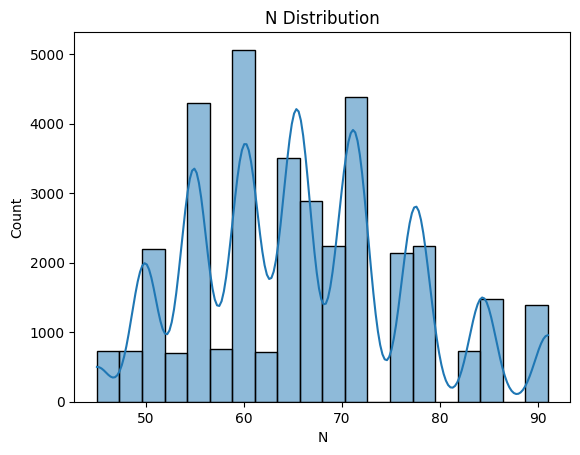

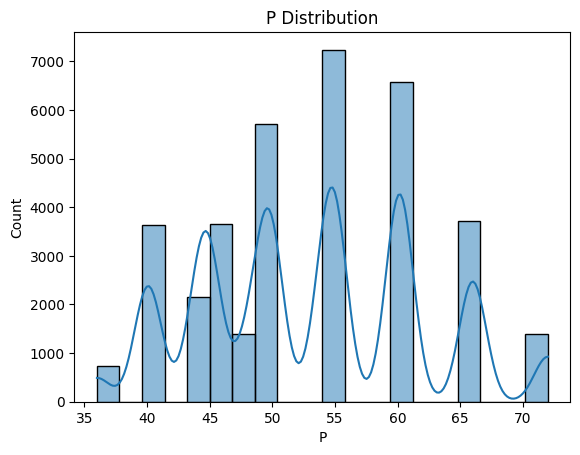

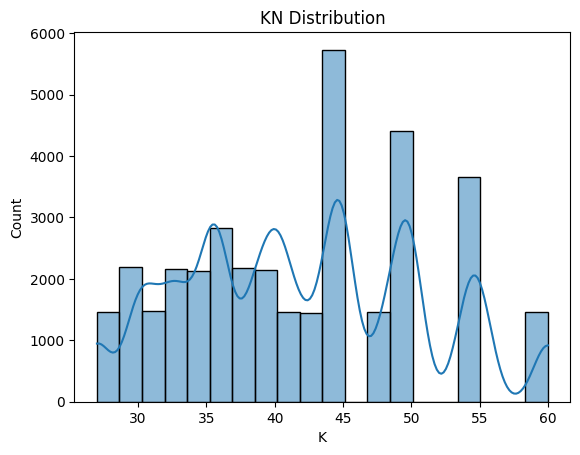

In [25]:
# Data Distribution
# Visualizes the distribution of soil pH values
# Nitrogen distribution 
sns.histplot(df['N'], kde=True, bins=20)
plt.title("N Distribution")
plt.show()

# P (Phosphorus) distribution
sns.histplot(df['P'], kde=True, bins=20)
plt.title("P Distribution")
plt.show()

# K (Potassium) distribution
sns.histplot(df['K'], kde=True, bins=20)
plt.title("KN Distribution")
plt.show()

### Insights from the graph
- N (Nitrogen) Distribution
  - Range: approximately 45 – 90
  - Most frequent interval: 55 – 70
  - Overall spread is relatively wide, but concentrated around 60, indicating that nitrogen levels are maintained stably at an adequate range.
- P (Phosphorus) Distribution
  - Range: approximately 35 – 70
  - Most frequent interval: 50 – 60
  - A clear peak around 55, suggesting that phosphorus, essential for crop growth, is concentrated in this range.
-K (Potassium) Distribution
  - Range: approximately 28 – 60
  - Most frequent interval: 40 – 50
  - Highest frequency around 45, with a relatively even distribution between 35 – 55.

- Summary
  - N, P, and K all show concentrated distributions: N around 60, P around 55, and K around 45.
  - This suggests that the three nutrients are stably present around their mid-range values and are aligned with agriculturally important optimal levels.
  - Therefore, the dataset indicates that soil fertility is generally well-balanced across key nutrients, which is likely to have a strong relationship with crop yield.

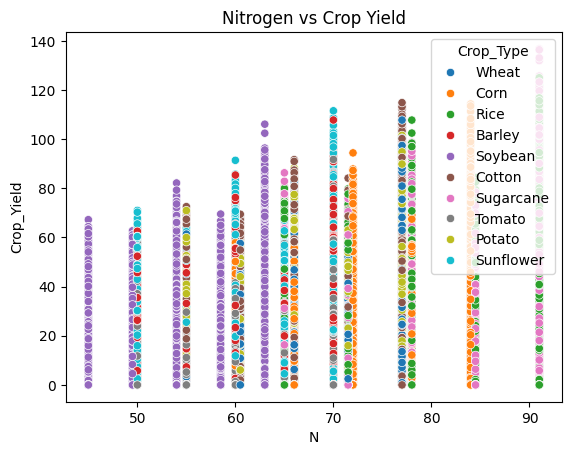

In [50]:
#Soil Nutrients Effect
# N (Nitrogen) vs Crop Yield
sns.scatterplot(data=df, x='N', y='Crop_Yield', hue='Crop_Type')
plt.title("Nitrogen vs Crop Yield")
plt.show()

### Insights from the graph
- verall trend: A positive correlation exists between nitrogen (N) levels and crop yield.
- N < 60 range: Yields are mostly within 0–80, with few high-yield cases.
- N 70–80 range: Yields expand significantly, with more cases exceeding 100.
- N 90 range: Some crops achieve the highest yields (120–140).
- Crop-specific note: The upward trend is consistent across all crops, though Rice, Sugarcane, and Cotton demonstrate stronger responses at higher N levels.

**In summary, Nitrogen (N) demonstrates a strong positive relationship with crop yield, with a noticeable surge in productivity once levels exceed approximately 70. This indicates that effective nitrogen management is a critical factor for maximizing crop yields.**

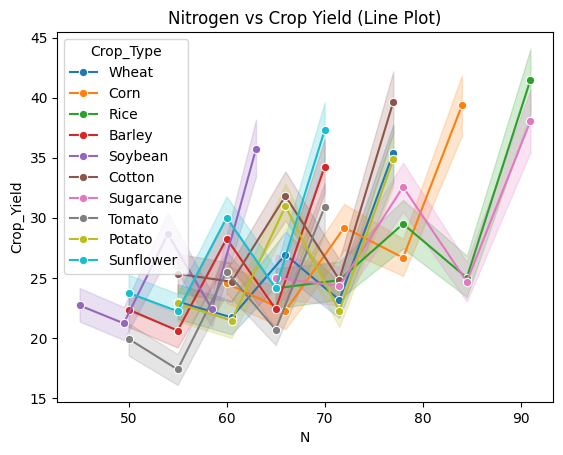

In [51]:
# Group by N (optional: bin N into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df, x='N', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Nitrogen vs Crop Yield (Line Plot)")
plt.show()

### Insights from the graph
- Overall trend: A clear positive correlation is observed, with yields increasing as nitrogen (N) levels rise.
- Low N range (≈45–55): Yields remain low (around 20–25) for most crops, with limited productivity.
- Moderate N range (≈60–75): Yields improve significantly, reaching 25–35. Crops like Soybean, Sugarcane, and Sunflower show sharper gains in this range.
- High N range (≈80–90+): Many crops reach their peak yields (40+), with Rice and Cotton showing the strongest response to higher nitrogen levels. Some fluctuations (temporary dips) appear, suggesting that soil, water, or other environmental factors may also play a role.

**In summary, Nitrogen (N) demonstrates a strong positive relationship with crop yield, with productivity surging once levels exceed ≈70.**

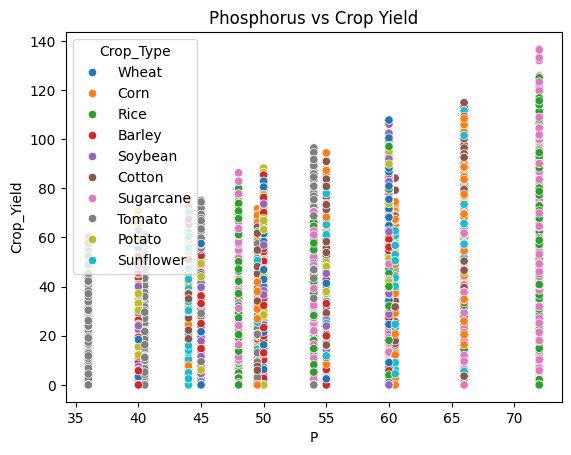

In [52]:
# Soil Phosphorus Effect
# P (Phosphorus) vs Crop Yield
sns.scatterplot(data=df, x='P', y='Crop_Yield', hue='Crop_Type')
plt.title("Phosphorus vs Crop Yield")
plt.show()

### Insights from the graph
- Overall trend: A clear positive correlation exists between phosphorus (P) levels and crop yield.
- P < 45 range: Yields are mostly within 0–70, with very few high-yield cases above 100.
- P 50–60 range: Yields increase significantly, with many crops reaching 80–100+.
- P > 65 range: Some crops achieve the highest yields (120–140).
- Crop-specific note: The upward trend is consistent across all crops, though Rice, Sugarcane, and Cotton demonstrate stronger responses at higher phosphorus levels.

**In summary, Phosphorus (P) shows a strong positive relationship with crop yield, with a marked surge in productivity once levels exceed ≈50.**

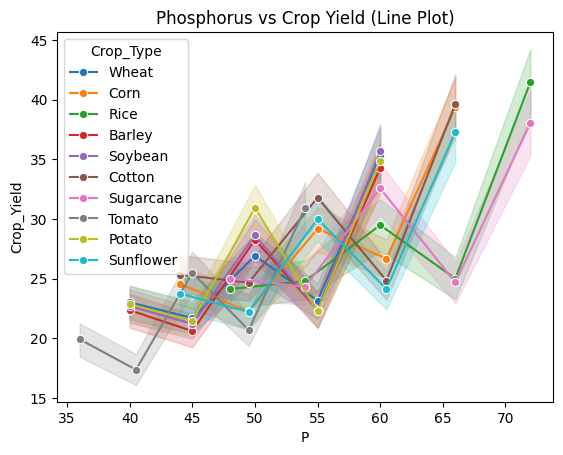

In [53]:
# Group by P (optional: bin P into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df, x='P', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Phosphorus vs Crop Yield (Line Plot)")
plt.show()

### Insights from the graph
- Overall trend: A clear positive correlation is observed, with yields increasing as phosphorus (P) levels rise.
- Low P range (≈35–45): Most crops remain at low yields (≈20–25).
- Moderate P range (≈50–60): Yields improve to 25–35, with more noticeable differences between crops.
- High P range (≈65–70+): Some crops (especially Rice, Cotton, and Sugarcane) achieve yields above 40.
- While all crops follow the same general upward trend, certain crops respond more sensitively to higher phosphorus levels.

**In summary, Phosphorus (P) has a strong positive relationship with crop yield, with productivity rising significantly once levels exceed ≈50.**

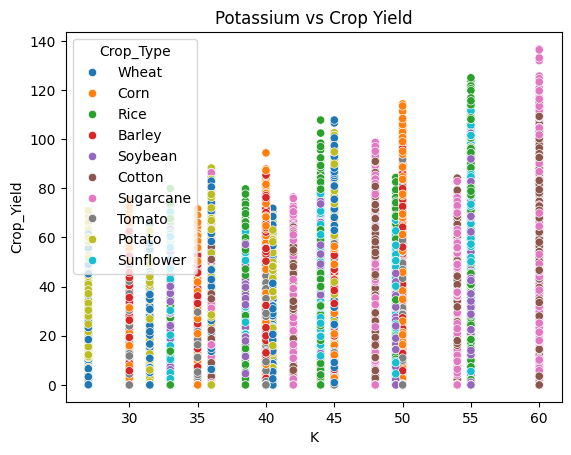

In [ ]:
#Soil Potassium Effect
# K (Potassium) vs Crop Yield
sns.scatterplot(data=df, x='K', y='Crop_Yield', hue='Crop_Type')
plt.title("Potassium vs Crop Yield")
plt.show()


### Insights from the graph
- Overall trend: A clear positive correlation exists between potassium (K) levels and crop yield.
- K < 35 range: Most crops remain within 0–80 yield, with few high-yield cases above 100.
- K 40–50 range: Yields rise significantly, with many crops reaching 80–110.
- K 55–60 range: Some crops (especially Rice, Corn, and Sugarcane) achieve their highest yields (120+).
- Crop-specific differences: While all crops follow the same upward trend, Rice and Corn respond more strongly at higher K levels, whereas others (e.g., Wheat, Barley) show smaller gains.

**In summary, Potassium (K) has a strong positive relationship with crop yield, with a sharp rise in productivity once levels exceed ≈40.**

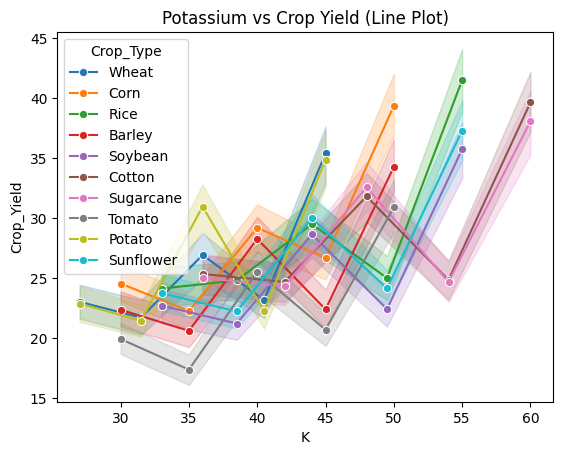

In [ ]:

# Group by K (optional: bin K into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df, x='K', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Potassium vs Crop Yield (Line Plot)")
plt.show()

### Insights from the graph
- Overall trend: There is a clear positive correlation between potassium (K) levels and crop yield.
- Low K range (≈28–35): Most crops remain at low yields (≈20–25), with limited productivity.
- Moderate K range (≈40–50): Yields gradually increase, reaching 25–35 across many crops.
- High K range (≈55–60): Many crops achieve their highest yields (40+), with Rice, Corn, and Cotton showing stronger responses compared to other crops.
- Crop-specific differences: Wheat and Barley exhibit more moderate increases, while Rice and Corn display sharp improvements in yield as K levels rise.

**In summary, Potassium (K) shows a strong positive relationship with crop yield, with productivity rising sharply once levels exceed ≈55.**

C:\Users\james\AppData\Local\Temp\ipykernel_27624\3434527548.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['pH_bin', 'Crop_Type'])['Crop_Yield'].mean().reset_index()


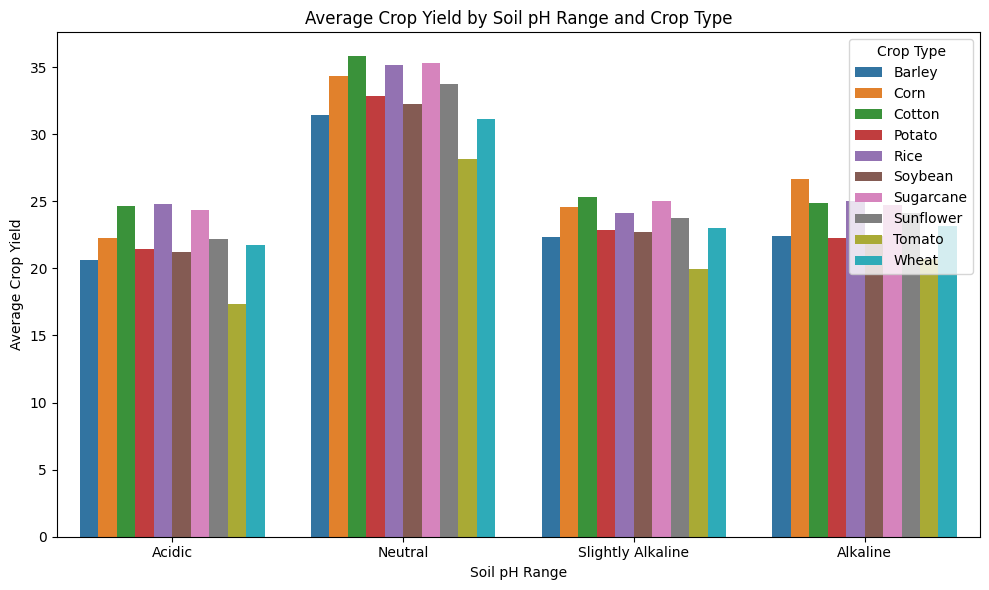

In [39]:
# Bin Soil_pH into categorical ranges
df['pH_bin'] = pd.cut(df['Soil_pH'], bins=[0, 5.5, 6.5, 7.5, 8],
                      labels=['Acidic', 'Neutral', 'Slightly Alkaline', 'Alkaline'])

# Group by Crop_Type and pH range
grouped = df.groupby(['pH_bin', 'Crop_Type'])['Crop_Yield'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='pH_bin', y='Crop_Yield', hue='Crop_Type')
plt.title("Average Crop Yield by Soil pH Range and Crop Type")
plt.xlabel("Soil pH Range")
plt.ylabel("Average Crop Yield")
plt.legend(title='Crop Type')
plt.tight_layout()
plt.show()

### Insights from the graph
- Overall trend: Across all crops, yields are highest in the Neutral pH range.
- Acidic range: Yields are lower for most crops, with Tomato being the weakest performer (below 20).
- Neutral range:
  - Nearly all crops reach peak productivity.
  - Cotton, Rice, and Sugarcane exceed 35, showing the strongest responses.
  - Tomato remains lower than others but still improves compared to the acidic range.
- Slightly Alkaline range: Yields decline overall, averaging around 23–26.
- Alkaline range: Some crops (notably Corn and Sunflower) maintain relatively higher yields, but most crops perform worse compared to neutral conditions.

**In Summary, Crop productivity is optimal in neutral soil pH (≈6.5–7.5), while acidic or alkaline conditions substantially reduce yields.**

In [29]:
# Soil_Quality analysis in progress
# Group by Soil_Quality and calculate mean Crop_Yield
mean_yield = df.groupby('Soil_Quality')['Crop_Yield'].mean().reset_index()
print(mean_yield)

    Soil_Quality  Crop_Yield
0             13   20.688952
1             14   22.546180
2             15   25.438011
3             16   24.842467
4             17   24.841423
5             22   19.753015
6             23   21.570056
7             24   22.216758
8             25   23.453587
9             27   24.803078
10            28   24.319644
11            34   21.302923
12            35   22.358314
13            36   22.945673
14            37   23.741861
15            39   24.934810
16            42   25.509305
17            43   25.925477
18            44   28.718622
19            46   30.001143
20            49   30.505138
21            53   29.487285
22            54   32.568904
23            58   30.903632
24            59   35.735613
25            60   34.262821
26            61   35.125013
27            64   37.290258
28            67   39.350728
29            68   39.639069
30            73   41.501328
31            74   38.071039


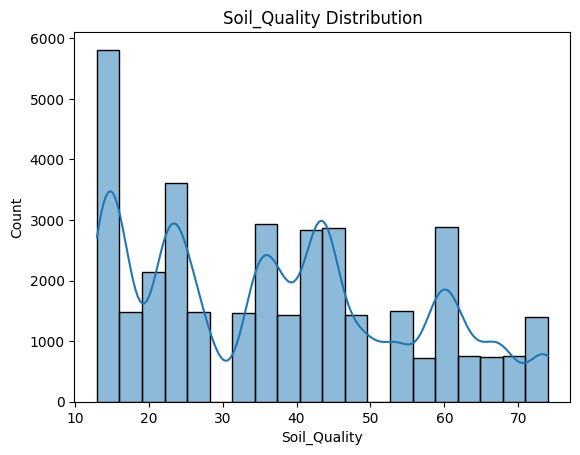

In [56]:
# Soil_Quality distribution 
sns.histplot(df['Soil_Quality'], kde=True, bins=20)
plt.title("Soil_Quality Distribution")
plt.show()

### Insights from the graph
- Range: Soil_Quality values are distributed between ≈10 and 75.
- Key intervals:
  - The 15–20 range shows the highest frequency (≈5,800+), suggesting many soil samples fall into lower quality levels.
  - Additional peaks occur around 20–25, 35–40, 45, and 60–65.
- Overall characteristics: The distribution is skewed toward the lower end (~20), with irregular peaks across the range.
- This indicates that the data shows clustered peaks rather than a uniform distribution.

**In summary, Soil_Quality is mostly concentrated in the lower range (15–25), with a few additional peaks. This suggests an uneven distribution of soil quality levels.**


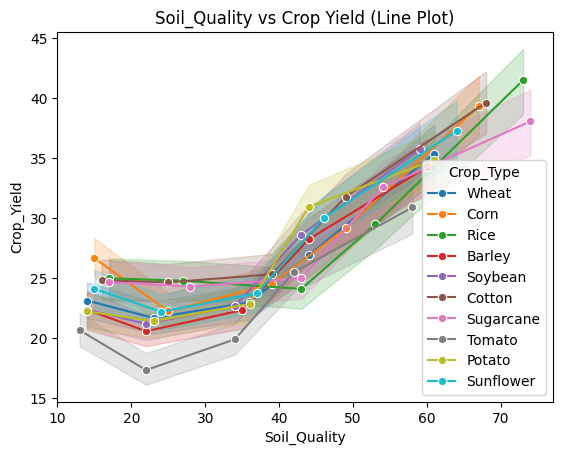

In [57]:
# Plot the relationship between Soil_Quality and Crop_Yield for each Crop_Type
sns.lineplot(data=df, x='Soil_Quality', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Soil_Quality vs Crop Yield (Line Plot)")
plt.show()

### Insights from the graph
- Overall trend: A strong positive correlation exists between Soil_Quality and Crop Yield.
- Low Soil_Quality (≈10–30):
  - Most crops remain at 20–25 yield, indicating poor productivity.
  - Tomato performs the worst, dropping below 20.
- Moderate Soil_Quality (≈40–50):
  - Yields gradually improve to 25–30, with smaller differences among crop types.
- High Soil_Quality (≈60–75):
  - All crops experience substantial gains, reaching 35–45 yields.
  - Rice, Cotton, and Potato show the strongest improvements under high Soil_Quality.

**In summary, Soil_Quality has a strong positive relationship with crop yield, with productivity improving significantly once values exceed ≈60.**

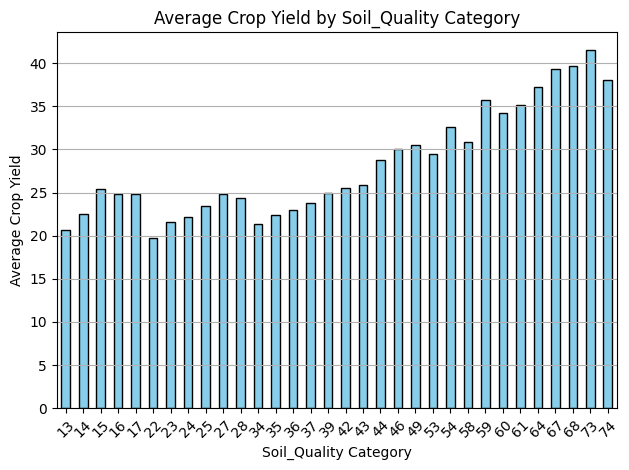

In [31]:
# Group by temperature category and calculate mean yield
mean_yield = df.groupby('Soil_Quality')['Crop_Yield'].mean()

# Plot bar chart
mean_yield.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Crop Yield by Soil_Quality Category')
plt.ylabel('Average Crop Yield')
plt.xlabel('Soil_Quality Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Insights from the graph
- Overall trend: There is a clear positive correlation between Soil_Quality and average crop yield.
- Low Soil_Quality (≈10–30):
  - Yields remain low, averaging 20–25.
- Moderate Soil_Quality (≈35–50):
  - Yields improve gradually, reaching 25–30+.
- High Soil_Quality (≈55–75):
  - Yields rise sharply, reaching 35–41.
- The highest averages (≈41+) are observed when Soil_Quality exceeds 70.

**In summary, Soil_Quality shows a strong positive relationship with crop yield, with peak productivity observed once values exceed ≈70.**

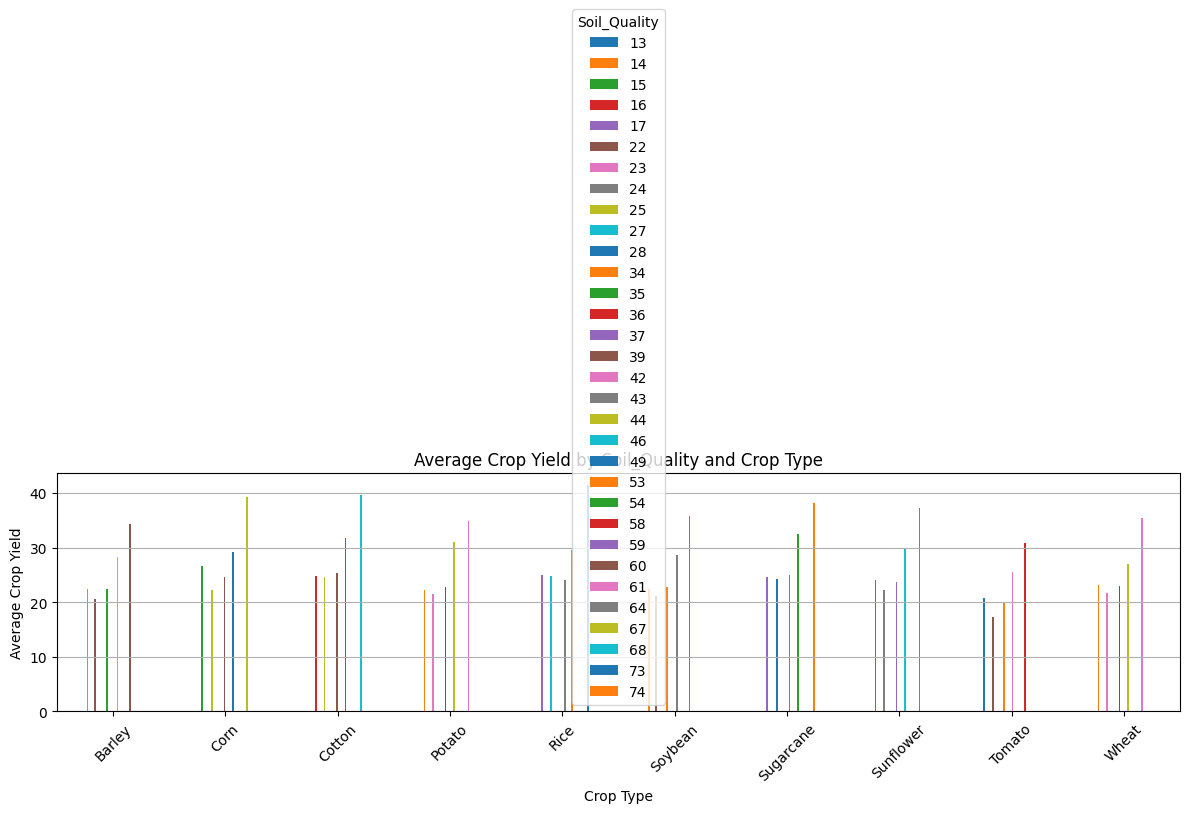

In [32]:
# Group by Crop_Type and Temp_Category, calculate mean Crop_Yield
grouped = df.groupby(['Crop_Type', 'Soil_Quality'])['Crop_Yield'].mean().unstack()

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Soil_Quality and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Soil_Quality')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Insights from the graph
- Overall trend: Higher Soil_Quality values generally lead to increased average yields across most crops.
- Crop-specific observations:
  - Corn, Cotton, Rice, and Sugarcane: Show the strongest response, reaching 30–40 yields under higher Soil_Quality.
  - Potato and Soybean: Exhibit steady improvements, peaking around ≈35.
  - Tomato, Barley, and Wheat: Less sensitive to Soil_Quality changes, with peak yields around ≈30.
- General insight: When Soil_Quality is low (≈20), yields remain at 20–25, but once Soil_Quality exceeds 60, key crops achieve significantly higher yields (35–40+).

**In summary, Soil_Quality strongly influences crop productivity, with Corn, Cotton, Rice, and Sugarcane benefiting the most from higher soil quality levels.**

In [33]:
# Bin Soil_Quality into categories (Low, Medium, High)
#bins = [0, 30, 60, 100]  # 0-30 = Low, 30-60 = Medium, 60-100 = High
#labels = ['Low', 'Medium', 'High']

bins = [ 20, 40, 50, 60, 70, 80] # 0~10, 10~20, 20~30, 30~40
labels = ['Very Low Quality', 'Low Quality', 'Medium Quality', 'High Quality', 'Very High Quality']

df['Soil_Quality_Category'] = pd.cut(df['Soil_Quality'], 
                                              bins=bins, labels=labels, include_lowest=True)
print(df.groupby('Soil_Quality_Category')['Crop_Yield'].mean())

Soil_Quality_Category
Very Low Quality     22.509256
Low Quality          28.050137
Medium Quality       32.581555
High Quality         37.360866
Very High Quality    39.756612
Name: Crop_Yield, dtype: float64


C:\Users\james\AppData\Local\Temp\ipykernel_27624\4223697719.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Soil_Quality_Category')['Crop_Yield'].mean())


C:\Users\james\AppData\Local\Temp\ipykernel_27624\2942938848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Crop_Type', 'Soil_Quality_Category'])['Crop_Yield'].mean().unstack()


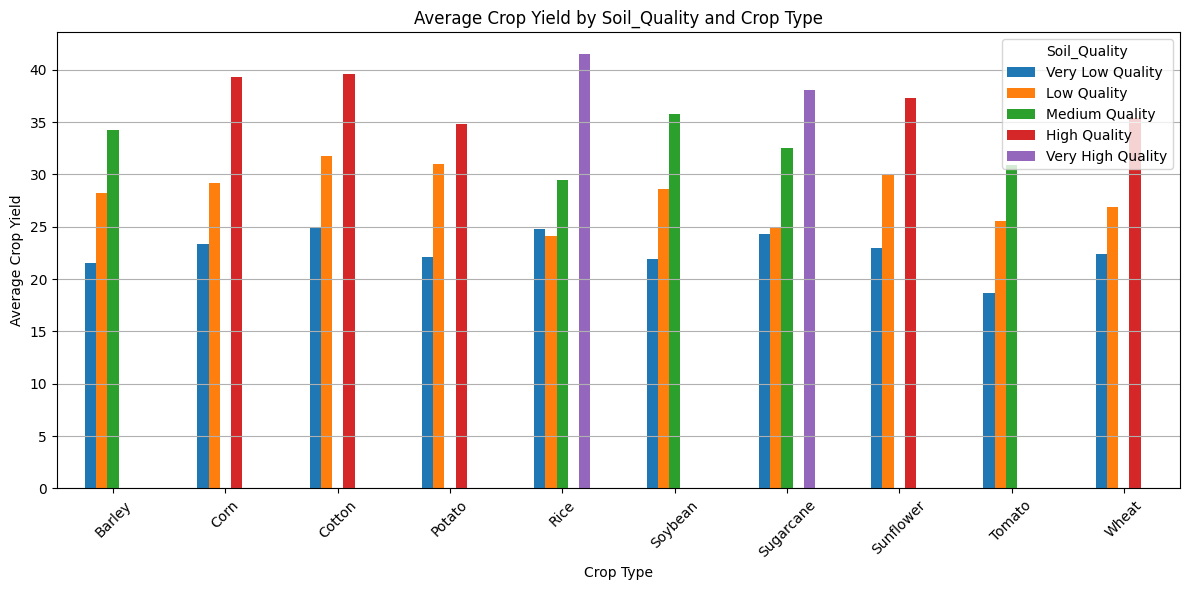

In [34]:
# Group by Crop_Type and Temp_Category, calculate mean Crop_Yield
grouped = df.groupby(['Crop_Type', 'Soil_Quality_Category'])['Crop_Yield'].mean().unstack()

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Soil_Quality and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Soil_Quality')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Insights from the graph
- Overall trend: Higher Soil_Quality consistently improves average crop yields across most crops.
- Very Low Quality: Lowest yields observed (≈18–25) across all crops.
- Low Quality: Moderate improvement, yields fall within ≈25–30.
- Medium Quality: Most crops exceed 30, with Soybean and Barley reaching around 35.
- High Quality: Major crops such as Corn, Cotton, and Wheat achieve high yields (≈35–40).
- Very High Quality: Certain crops (Rice, Sugarcane) surpass 40, achieving the highest productivity.
- Crop-specific notes:
  - Rice, Sugarcane → strongest positive response to Soil_Quality improvements.
  - Corn, Cotton, Sunflower → stable and strong yields (35–40) under High Quality.
  - Tomato, Barley → relatively smaller improvements compared to other crops.
  
**In Summary, Soil_Quality strongly correlates with yield, with Rice and Sugarcane showing the greatest improvements under very high soil quality.**  

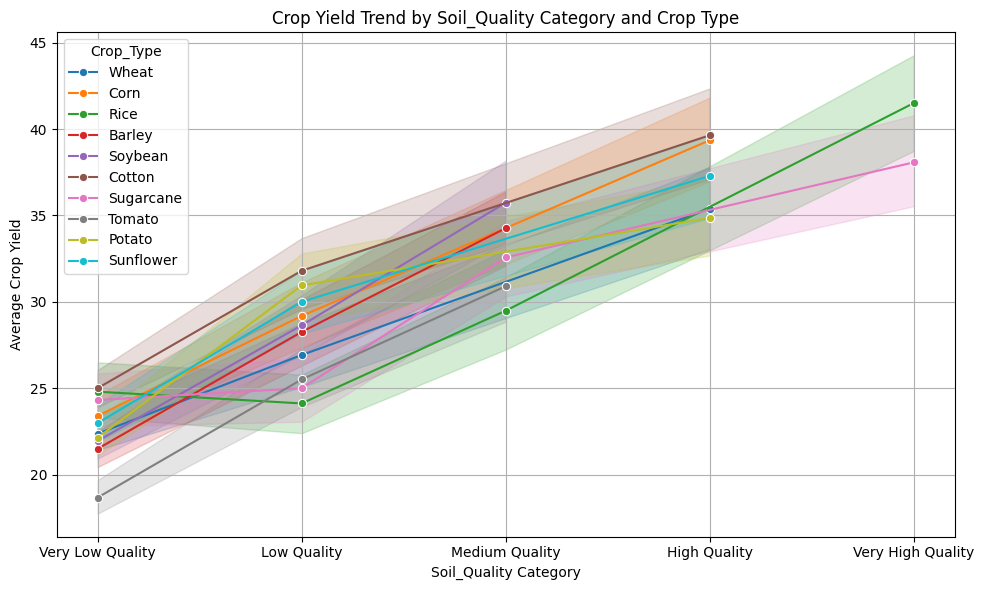

In [72]:
plt.figure(figsize=(10, 6))
# Seaborn lineplot: Crop_Yield by Crop_Type and Temp_Category
sns.lineplot(data=df, x='Soil_Quality_Category', y='Crop_Yield', hue='Crop_Type', marker='o')

plt.title('Crop Yield Trend by Soil_Quality Category and Crop Type')
plt.xlabel('Soil_Quality Category')
plt.ylabel('Average Crop Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights from the graph
- Overall trend: A clear positive correlation exists, with yields consistently improving as Soil_Quality increases.
- Very Low Quality:
  - Most crops remain at 20–25 yield, with Tomato dropping below 20.
- Low Quality:
  - Yields improve to 25–30, with Corn, Cotton, and Soybean showing stronger responses.
- Medium Quality:
  - Crops move into the 30–35 range, with Wheat, Corn, and Rice showing distinct improvements.
- High Quality:
  - Corn, Cotton, Rice, and Sugarcane approach ≈40 yields.
  - Soybean, Potato, and Sunflower also reach stable yields above 35.
- Very High Quality:
  - Rice and Corn achieve the highest yields (≈42–44).
  - All crops reach peak productivity, highlighting Soil_Quality as a critical factor.

**In Summary, Soil_Quality strongly impacts productivity, with Corn and Rice showing the most significant yield gains at the highest quality levels.**

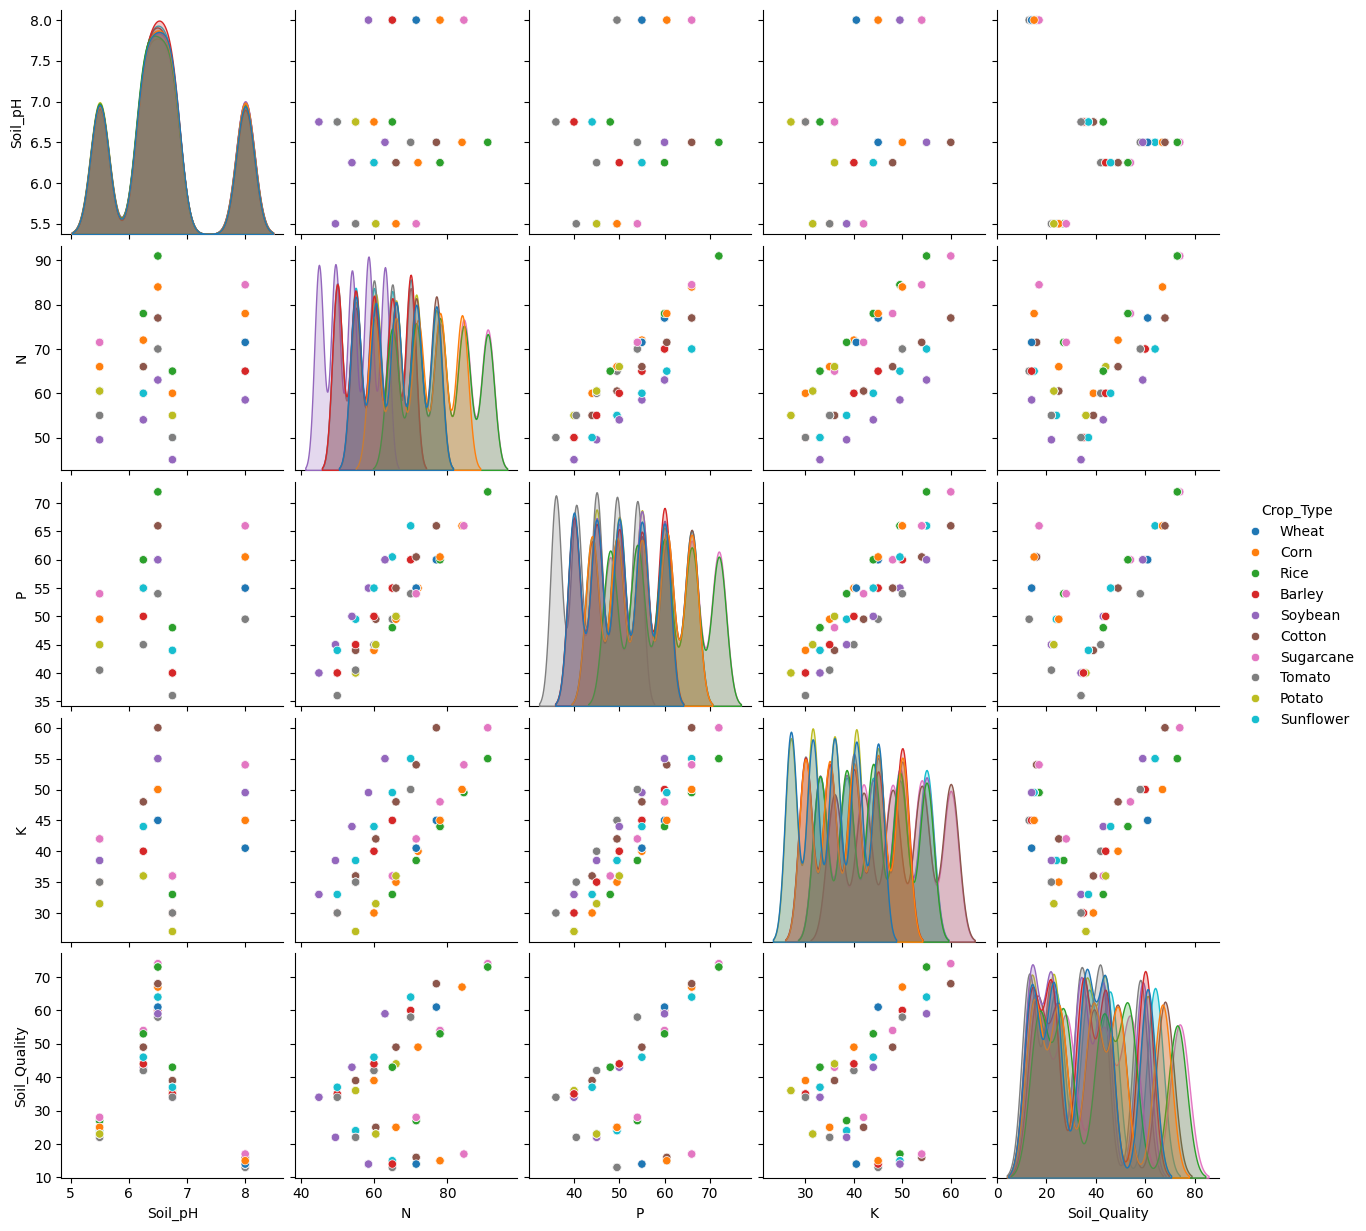

In [36]:
# Multivariate Analysis (Extra)
# Pair plot to visualize multiple relationships at once
sns.pairplot(df[['Soil_pH','N','P','K','Soil_Quality','Crop_Type']], hue='Crop_Type')
plt.show()

### Insights from the graph
- Soil_pH
  - Mostly concentrated between 6.0 and 7.5, clustered around neutral levels.
  - No strong linear relationship with other variables → acts as a more independent feature.
- N (Nitrogen), P (Phosphorus), K (Potassium)
  - Strong positive correlations exist among N, P, and K.
  - Scatter plots show near-linear relationships → nutrients tend to increase together.
  - Suggests balanced nutrient management across these elements.
- Soil_Quality
  - Strong positive correlations with N, P, and K.
  - Higher Soil_Quality is consistently associated with higher nutrient levels.
  - Indicates Soil_Quality effectively reflects nutrient richness.
- Crop distribution (Crop_Type)
  - Crops are fairly evenly spread across variables,
  - But Rice and Sugarcane appear more often at higher Soil_Quality,
  - While Tomato occurs frequently at lower Soil_Quality levels.

**In Summary, N, P, and K are strongly interrelated and closely tied to Soil_Quality, while Soil_pH behaves more independently. Rice and Sugarcane thrive in higher Soil_Quality, whereas Tomato is more common in lower Soil_Quality regions.**  

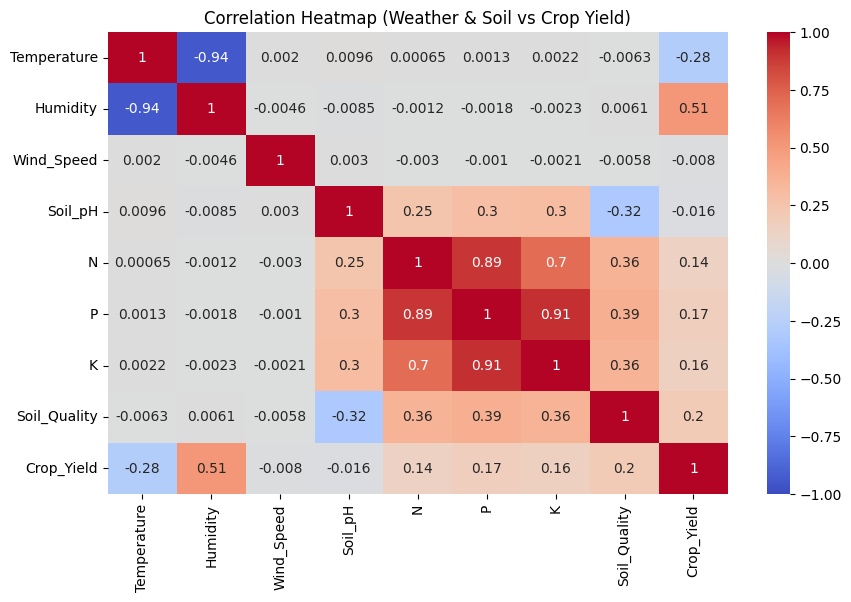

In [73]:
# Relationship Analysis with selected fields
# Define relevant features (weather + soil + target)
features = ['Temperature','Humidity','Wind_Speed',
            'Soil_pH','N','P','K','Soil_Quality','Crop_Yield']

# Select subset of DataFrame
corr_df = df[features]

# Calculate correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Weather & Soil vs Crop Yield)")
plt.show()

### Insights from the graph
- Correlation with Crop_Yield
  - Humidity (0.51): Strongest positive correlation → higher humidity boosts yield.
  - Temperature (-0.28): Clear negative correlation → higher temperatures reduce yield.
  - Soil_Quality (0.20), P (0.17), K (0.16), N (0.14): Weak positive correlations → soil nutrients and quality contribute, but their direct impact is moderate.
- Weather factors
  - Temperature ↔ Humidity (-0.94): Extremely strong negative correlation → hotter conditions mean lower humidity.
- Soil nutrients (N, P, K)
  - N ↔ P (0.89), P ↔ K (0.91), N ↔ K (0.70): Strong positive correlations → nutrients tend to rise together.
  - This suggests nutrient management is interdependent rather than isolated.
- Soil_Quality
  - Correlated with P (0.39), N (0.36), K (0.36): Soil quality moderately reflects nutrient levels.
  - Soil_Quality ↔ Soil_pH (-0.32): Higher pH relates to lower Soil_Quality → overly alkaline soil may reduce quality.

**In Summary, Crop yield is positively correlated with humidity and negatively with temperature, while showing weaker links with soil quality and nutrients. N, P, and K are highly interrelated, and Soil_Quality moderately reflects nutrient richness.**  

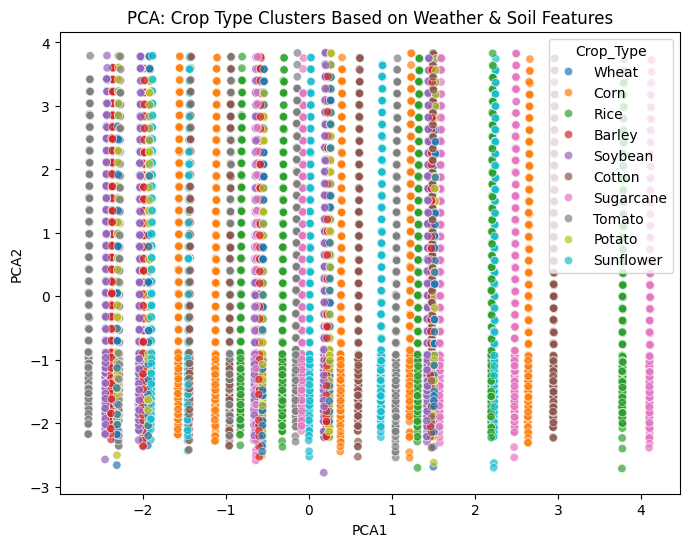

Explained variance ratio: [0.3698923  0.24257294]


In [ ]:
# PCA 2D Analysis

# 1. Define the weather + soil features (exclude target 'Crop_Yield')
features = ['Temperature','Humidity','Wind_Speed',
            'Soil_pH','N','P','K','Soil_Quality']

X = df[features]

# 2. Standardize the features (Scaling is essential before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1','PCA2'])
pca_df['Crop_Type'] = df['Crop_Type']   # Use Crop_Type for color grouping

# 5. Plot PCA scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Crop_Type', alpha=0.7, palette='tab10')
plt.title("PCA: Crop Type Clusters Based on Weather & Soil Features")
plt.show()

# 6. Print explained variance ratio of PCA components
print("Explained variance ratio:", pca.explained_variance_ratio_)

### Insights from the graph
- Overall distribution
  - The PCA plot shows data points forming vertical stripe patterns, suggesting discrete effects from certain features (e.g., categorical encoding or repeated values).
- Clustering
  - Most crop types (Wheat, Corn, Rice, Soybean, etc.) overlap heavily, with no clear separation.
  - A few crops (e.g., Rice, Sugarcane, Cotton) occupy slightly distinct areas, but overlap is still significant.
- Interpretation
  - PCA1 and PCA2 capture part of the variance but are not sufficient to clearly distinguish crop types.
  - This suggests crop differences are influenced by multi-dimensional interactions of weather and soil features.
  - Using additional components (PCA3+) or non-linear methods (K-means, t-SNE, UMAP) may provide better separation.

**In summary, PCA visualization shows heavy overlap among crop types, indicating that higher-dimensional or clustering methods are required for clearer separation.**


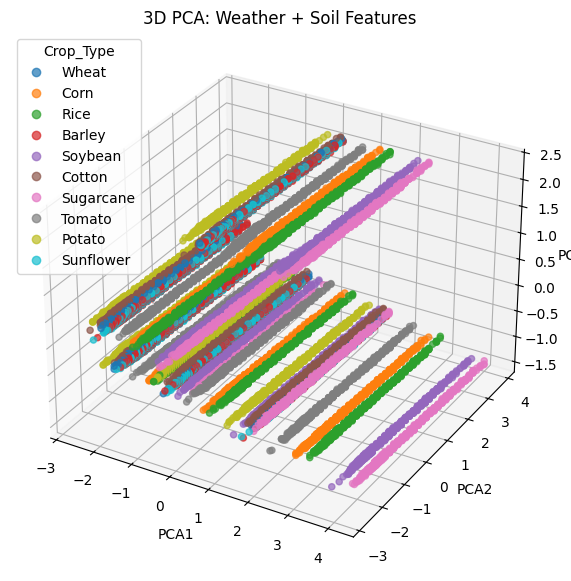

Explained variance ratio: [0.3698923  0.24257294 0.16439355]
Total variance explained: 0.7768587882472444


In [76]:
# PCA 3D Analysis

# 1. Weather + Soil features (exclude Crop_Yield)
features = ['Temperature','Humidity','Wind_Speed',
            'Soil_pH','N','P','K','Soil_Quality']
X = df[features]

# 2. Standardize (PCA requires scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA → 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 4. Create DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1','PCA2','PCA3'])
pca_df['Crop_Type'] = df['Crop_Type']  # For coloring

# 5. 3D Visualization
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with Crop_Type coloring
scatter = ax.scatter(
    pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'],
    c=pca_df['Crop_Type'].astype('category').cat.codes,
    cmap='tab10', alpha=0.7
)

ax.set_title("3D PCA: Weather + Soil Features")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

# 6. Legend (fix: use both handles and labels OR map manually)
handles, _ = scatter.legend_elements()   # get handles from scatter
unique_types = pca_df['Crop_Type'].unique()  # original crop names
ax.legend(handles, unique_types, title="Crop_Type")

plt.show()

# 7. Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


### Insights from the graph
- Distribution shape
  - Using PCA1, PCA2, and PCA3, the data still shows striped patterns, likely due to discrete or repeated values in some features.
- Clustering
  - Major crops such as Wheat, Corn, Barley, and Soybean overlap heavily, making it difficult to identify distinct clusters.
  - Rice, Sugarcane, and Potato occupy slightly different areas, but separation is not complete.
- Interpretation
  - Compared to 2D PCA, 3D PCA captures more variance but still fails to fully distinguish crop types.
  -This suggests that crop differences are not fully explained by weather and soil features alone.

**In summary, Even in 3D PCA, crop types are not clearly separated, showing that weather and soil data alone are insufficient for strong differentiation.**

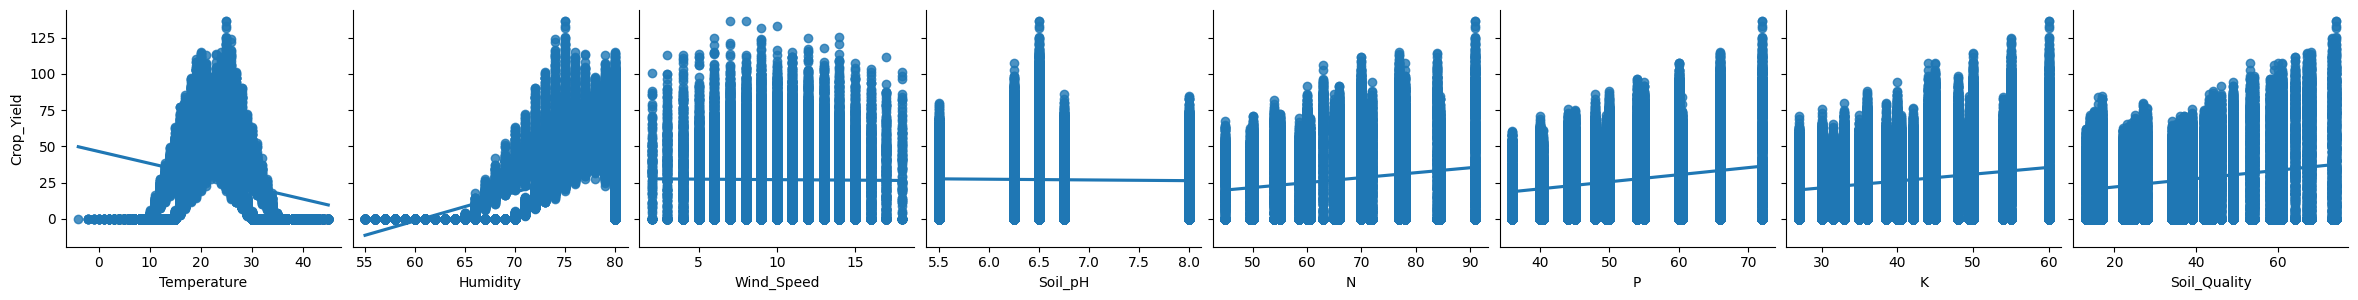

In [ ]:
# Define features
features = ['Crop_Yield','Temperature','Humidity','Wind_Speed',
            'Soil_pH','N','P','K','Soil_Quality']

# Correlation of each variable with Crop_Yield
correlations = df[features].corr()['Crop_Yield'].sort_values(ascending=False)

sns.pairplot(df[features], y_vars=["Crop_Yield"], 
             x_vars=['Temperature','Humidity','Wind_Speed','Soil_pH','N','P','K','Soil_Quality'], 
             kind='reg', height=3, aspect=1)
plt.show()

### Insights from the graph
- Temperature
  - Shows a curved (non-linear) relationship.
  - Maximum yields occur at around 20–25°C.
  - Very low (<10°C) or high (>30°C) temperatures drastically reduce yield.
- Humidity
  - Strong positive correlation.
  - Optimal yields are observed at 70–80% humidity.
  - Lower humidity (<60%) significantly reduces yield.
- Wind_Speed
  - No strong correlation.
  - Distribution is relatively even within 0–15 → minimal effect on yield.
- Soil_pH
  - Almost no correlation.
  - Mostly concentrated in the 6.0–7.0 range, limiting impact.
- N, P, K (Nutrients)
  - All show positive correlations with yield.
  - Higher nutrient levels lead to higher yield.
  - N and P exhibit broader variation → stronger contributors.
- Soil_Quality
  - Clear positive correlation.
  - Higher Soil_Quality consistently increases Crop_Yield.

**In summary, Yield is most influenced by temperature (20–25°C optimum), humidity (70–80%), soil quality, and nutrients (N, P, K). Wind speed and pH show minimal impact.**

## Potential Research Question

“How do weather conditions (temperature, humidity, wind speed) and soil properties (pH, nutrients, and quality) influence crop yield, and what are the optimal environmental ranges for maximizing production?”

### EDA-Based Observations
1. Crop Yield Distribution
- The yield values are highly skewed, with many low or zero yields.
- Zero values represent genuine crop failure rather than missing data, making it essential to investigate the environmental conditions that lead to such outcomes.
2. Temperature
- A clear non-linear relationship was observed: yields peak around 20–25 °C but drop sharply outside this range.
- Suggests temperature thresholds play a critical role in crop viability.
3. Humidity
- Positive correlation with yield, with optimal performance in the 70–80% range.
- Low humidity levels are strongly associated with crop failure.
4. Soil Nutrients (N, P, K)
- All three nutrients show strong positive correlations with each other and moderate positive relationships with yield.
- Indicates fertility management is a major driver of productivity.
5. Soil Quality
- Consistently shows a positive association with yield, reinforcing that higher quality soils support better production.
6. Soil pH
- Most yields cluster in the 6.0–7.5 range, suggesting that neutral to slightly acidic soils are more favorable.